# Example of Using NBA_API Repository

# Using NBA Player Names In Order To Obtain Pts Per Season & Plot Them

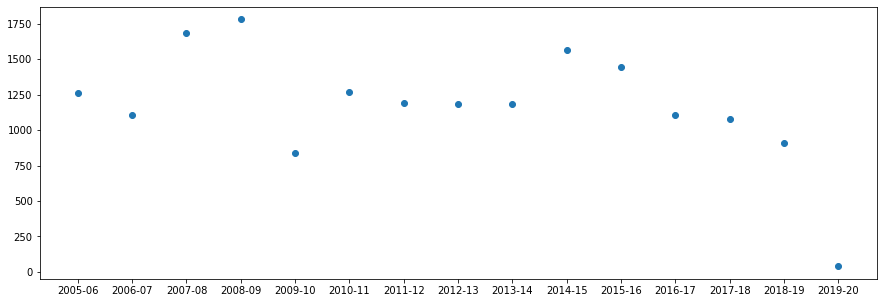

In [47]:
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from matplotlib import pyplot as plt


nba_player = players.get_active_players()
inactive_nba_player = players.get_inactive_players()
df_nba_player = pd.DataFrame(nba_player)
df_inactive_nba_player = pd.DataFrame(inactive_nba_player)
index_nba_player = df_nba_player.set_index('full_name')


class Player:
    
    def id(self, playername):
        
        if playername in list(df_nba_player['full_name']):
            nba_player_id = index_nba_player.loc[playername]['id']
            career_stats = playercareerstats.PlayerCareerStats(nba_player_id)
            df_career_stats = career_stats.get_data_frames()[0]
            plt.rcParams['figure.figsize'] = [15,5]
            return plt.scatter(df_career_stats['SEASON_ID'], df_career_stats['PTS'])
        
        elif playername in list(df_inactive_nba_player['full_name']):
            return f" {playername}: is no longer an active NBA player"
        
        else:
            return f"{playername}: Isn't an NBA player or you spelt their name incorrectly"

            

player = Player()
plot_pts = player.id('Chris Paul')
print(plot_pts)



        
        

# Using NBA Player Names In Order To Obtain Career Stats

In [43]:
active_nba_player = index_nba_player.loc['Chris Paul']['id']
nba_player_career_stats = playercareerstats.PlayerCareerStats(player_id=active_nba_player)
nba_player_career_stats.get_data_frames()[0]



,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,101108,2005-06,00,1610612740,NOK,21.0,78,78,2808.0,407,...,0.847,61,339,400,611,175,6,183,218,1258
1,101108,2006-07,00,1610612740,NOK,22.0,64,64,2353.0,381,...,0.818,54,226,280,569,118,3,161,154,1104
2,101108,2007-08,00,1610612740,NOH,23.0,80,80,3006.0,630,...,0.851,62,259,321,925,217,4,201,185,1684
3,101108,2008-09,00,1610612740,NOH,24.0,78,78,3002.0,631,...,0.868,69,363,432,861,216,10,231,212,1781
4,101108,2009-10,00,1610612740,NOH,25.0,45,45,1712.0,314,...,0.847,20,171,191,480,96,8,112,118,841
5,101108,2010-11,00,1610612740,NOH,26.0,80,80,2880.0,430,...,0.878,38,289,327,782,188,5,177,196,1268
6,101108,2011-12,00,1610612746,LAC,27.0,60,60,2181.0,425,...,0.861,42,171,213,543,152,4,124,138,1189
7,101108,2012-13,00,1610612746,LAC,28.0,70,70,2335.0,412,...,0.885,53,209,262,678,169,10,159,143,1186
8,101108,2013-14,00,1610612746,LAC,29.0,62,62,2171.0,406,...,0.855,38,230,268,663,154,4,145,157,1185
9,101108,2014-15,00,1610612746,LAC,30.0,82,82,2857.0,568,...,0.900,52,324,376,838,156,15,190,203,1564
